In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from xgboost import plot_importance
from matplotlib import pyplot

In [2]:
d = open('student-por.csv','r')
data_lst = [line.strip('\n').replace('"','').split(';') for line in d.readlines()]
data = pd.DataFrame(data_lst, columns = data_lst[0])
pd.set_option('display.max_columns', None)
data = data.drop(index = 0)
data = data.reset_index()
data = data.apply(pd.to_numeric,errors = 'ignore')
data.set_index(["index"], inplace=True)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
5,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [3]:
grade = []
for i in data.G1:
    if i <= 9:
        grade.append('A')
    elif i>9 and i<=15:
        grade.append('B')
    else:
        grade.append('C')
data['g1']=grade
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,g1
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,A
2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,A
3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,B
4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,B
5,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,B


In [4]:
demographic_data_lst = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','nursery','internet','famsup']
data_to_onehot = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','nursery','internet','famsup']

In [5]:
data_demo = data[demographic_data_lst]

In [6]:
data2=pd.get_dummies(data_demo)
data2.head()

,age,Medu,Fedu,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,nursery_no,nursery_yes,internet_no,internet_yes,famsup_no,famsup_yes
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,18,4,4,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0
2,17,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1
3,15,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0
4,15,4,2,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1
5,16,3,3,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1


In [7]:
train_data_header = data2.columns.tolist()
train_data = data2.values
train_data.shape

(649, 36)

In [8]:
train_x = train_data[:, 0:-3]
train_y = data.values[:, -1]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size=0.2,random_state=123)

In [10]:
model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy_score(y_test,pred)

0.7

In [11]:
import xgboost
from xgboost import XGBClassifier

modelXGB = XGBClassifier()
modelXGB.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.7153846153846154


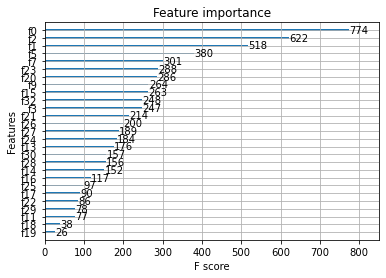

In [12]:
predXGB = modelXGB.predict(x_test)
print(accuracy_score(y_test,predXGB))
modelXGB.feature_importances_
plot_importance(modelXGB)
pyplot.show()

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_to_numeric = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','nursery','internet','famsup']
data_demo_num = data[demographic_data_lst]
for i in data_to_numeric:
    data_demo_num[i] = label_encoder.fit_transform(data_demo_num[i])

c:\users\19501\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
data_demo_num.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,nursery,internet,famsup
index,,,,,,,,,,,,,,,
1,0,0,3,1,0,0,4,4,0,4,0,1,1,0,0
2,0,0,2,1,0,1,1,1,0,2,0,0,0,1,1
3,0,0,0,1,1,1,1,1,0,2,2,1,1,1,0
4,0,0,0,1,0,1,4,2,1,3,1,1,1,1,1
5,0,0,1,1,0,1,3,3,2,2,1,0,1,0,1


In [15]:
train_data_header = data_demo_num.columns.tolist()
train_data = data_demo_num.values
train_data.shape

(649, 15)

In [16]:
train_x = train_data[:, 0:-3]
train_y = data.values[:, -1]
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size=0.2,random_state=123)
model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy_score(y_test,pred)

0.7307692307692307

0.7307692307692307


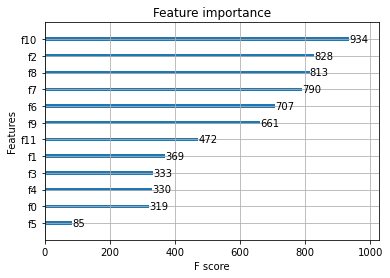

In [17]:
modelXGB.fit(x_train, y_train)
predXGB = modelXGB.predict(x_test)
print(accuracy_score(y_test,predXGB))
modelXGB.feature_importances_
plot_importance(modelXGB)
pyplot.show()

In [18]:
data_demo_num['merge_edu'] = (data_demo_num['Medu']+1)*(data_demo_num['Fedu']+1)
data_demo_num['merge_job'] = (data_demo_num['Mjob']+1)*(data_demo_num['Fjob']+1)
data_merge = data_demo_num[['school','sex','age','address','famsize','Pstatus','merge_edu','merge_job','reason','guardian','nursery','internet','famsup']]

c:\users\19501\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\19501\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
train_data_header = data_merge.columns.tolist()
train_data = data_merge.values
train_data.shape

(649, 13)

In [20]:
train_x = train_data[:, 0:-3]
train_y = data.values[:, -1]
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size=0.2,random_state=123)
model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy_score(y_test,pred)

0.6923076923076923

0.7384615384615385
[0.18175869 0.09312689 0.10775793 0.08740634 0.10497884 0.07887135
 0.08388872 0.08537137 0.09084729 0.0859926 ]


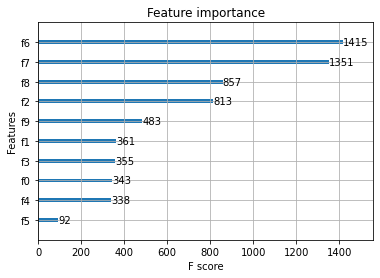

In [22]:
modelXGB.fit(x_train, y_train)
predXGB = modelXGB.predict(x_test)
print(accuracy_score(y_test,predXGB))
print(modelXGB.feature_importances_)
plot_importance(modelXGB)
pyplot.show()

In [65]:
data_merge.head()

,school,sex,age,address,famsize,Pstatus,merge_edu,merge_job,reason,guardian,nursery,internet,famsup
index,,,,,,,,,,,,,
1,0,0,3,1,0,0,25,5,0,1,1,0,0
2,0,0,2,1,0,1,4,3,0,0,0,1,1
3,0,0,0,1,1,1,4,3,2,1,1,1,0
4,0,0,0,1,0,1,15,8,1,1,1,1,1
5,0,0,1,1,0,1,16,9,1,0,1,0,1


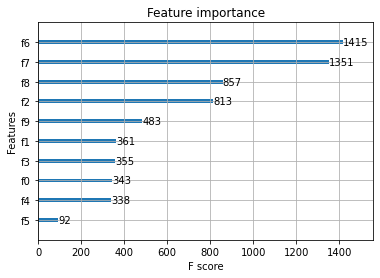

In [91]:
plot_importance(modelXGB)
pyplot.show()

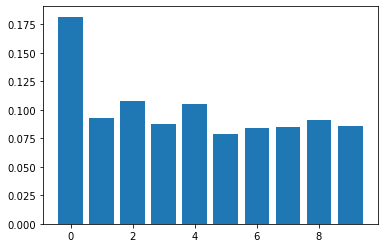

In [95]:
pyplot.bar(range(len(modelXGB.feature_importances_)), modelXGB.feature_importances_)
pyplot.show()